# UAS TEKNIK PENGOLAHAN ISYARAT BIOMEDIS
Semester Gasal T.A. 2021/2022, Dosen Pengampu : Dr. INDAH SOESANTI, S.T., M.T.

Valencia, NIM: 19/446479/TK/49584

Zafira Farhani, NIM: 19/446482/TK/49587

# Analisis Perbedaan Suara Jantung Normal dan Patologis menggunakan Fonokardiogram dengan Bahasa Pemrograman Python

# 1. Download Libraries
a. LibROSA: salah satu library dalam Python untuk analisis musik dan audio. LibROSA menyediakan blok bangunan yang diperlukan untuk membuat sistem pengambilan informasi musik.

b. Scipy: sumber terbuka berisi kumpulan algoritme dan fungsi matematika untuk bahasa pemrograman Python.

c. Wav: modul gelombang untuk menyediakan antarmuka yang nyaman untuk format suara WAV.

d. Keras dengan TensorFlow: Keras adalah API tingkat tinggi yang berjalan di atas TensorFlow tipe scikit-learn (ditulis dengan Python) untuk membangun Neural Networks.

In [1]:
#Pemrosesan Data Standar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, auc, roc_auc_score, precision_recall_curve, accuracy_score
#Pemrosesan Audio
from IPython.display import Audio
from scipy.io import wavfile

#LibROSA
import librosa
import librosa.display

#Keras dengan TensorFlow 
from keras.models import Sequential
from keras import Input
from keras.layers import Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense, LSTM, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from keras import backend as K 

# 2. Audio File
Sumber: https://physionet.org/content/challenge-2016/1.0.0/

In [2]:
def load_wave_file(path):
    wav, sr = librosa.load(path)
    return wav, sr

In [3]:
wav_path = '/Users/ASUS/heart_sound/'
wav, sr = load_wave_file(wav_path+'training-a/a0409.wav')
wav2, sr2 = load_wave_file(wav_path+'training-a/a0408.wav')

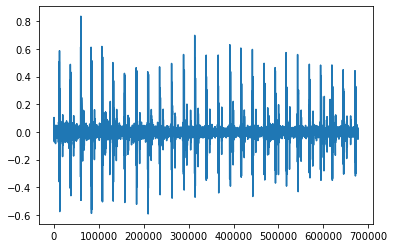

In [4]:
wav, sr = load_wave_file(wav_path+'training-a/a0409.wav')
plt.plot(wav)

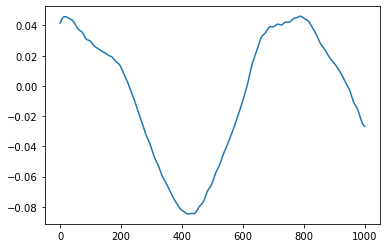

In [5]:
plt.plot(wav[3500:4500])

# 3. Bedakan antara Suara Jantung Normal dan Tidak Normal

In [6]:
training_a = pd.read_csv('/Users/ASUS/heart_sound/training-a/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])
training_b = pd.read_csv('/Users/ASUS/heart_sound/training-b/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])
training_c = pd.read_csv('/Users/ASUS/heart_sound/training-c/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])
training_d = pd.read_csv('/Users/ASUS/heart_sound/training-d/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])
training_e = pd.read_csv('/Users/ASUS/heart_sound/training-e/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])
training_f = pd.read_csv('/Users/ASUS/heart_sound/training-f/REFERENCE-SQI.csv',names=["wavfile", "actuals", "pred"])

In [7]:
train = pd.concat([training_a, training_b,training_c,training_d,training_e,training_f], axis=0)

In [8]:
category_group = train[['wavfile', 'actuals', 'pred']].groupby(['actuals','pred']).count()
category_group

wavfile
actuals pred         
-1      0         271
        1        2304
 1      0          93
        1         572

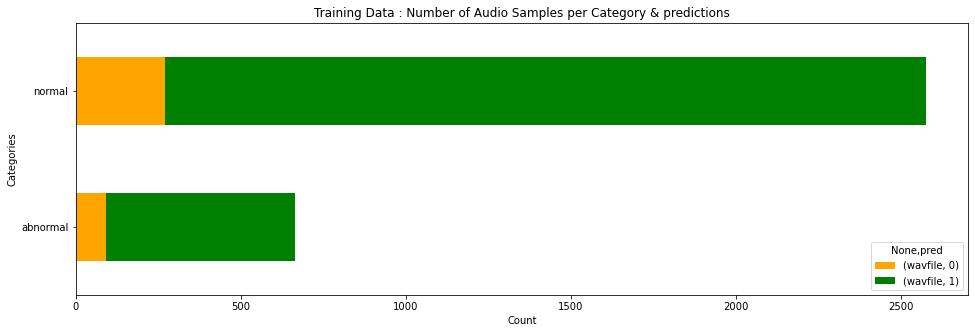

In [9]:
#Ada 2 jenis file gelombang: 
#Normal (-1)
#Abnormal (1)

catlabels = ['abnormal', 'normal']
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='barh', stacked=True, title="Training Data : Number of Audio Samples per Category & predictions",color=["orange","green"], figsize=(16,5))
plot.set_yticklabels(catlabels)
plot.set_xlabel("Count")
plot.set_ylabel("Categories");

# 4. Dengar dan Visualisasikan setiap Kelas

In [10]:
#Fungsi Helper
def get_wave_path(wav_file_name,wav_path):
    if (wav_file_name[0] =='a'):
        wav_path = wav_path + "training-a/" + wav_file_name +".wav"
        print(wav_path)
    elif (wav_file_name[0] =='b'):
        wav_path = wav_path + "training-b/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='c'):
        wav_path = wav_path + "training-c/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='d'):
        wav_path = wav_path + "training-d/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='e'):
        wav_path = wav_path + "training-e/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='f'):
        wav_path = wav_path + "training-f/" + wav_file_name +".wav"
    return wav_path

In [11]:
normals = train.query('actuals == "1"')['wavfile'].tolist()
#print(wav_path)
normal_sound_file = get_wave_path(str(normals[1]),wav_path)
#print(sound_file)
Audio(normal_sound_file)

#Play Audio Suara Jantung Normal
from playsound import playsound
playsound('a0002.wav')
print('Memainkan audio a0002.wav selesai')

/Users/ASUS/heart_sound/training-a/a0002.wav
Memainkan audio a0002.wav selesai


In [12]:
#Plot Normal Wave
normal_wav, sr = load_wave_file(normal_sound_file)
#Abnormals
abnormals = train.query('actuals == "-1"')['wavfile'].tolist()
#print(wav_path)
abnormal_sound_file = get_wave_path(str(abnormals[1]),wav_path)
#Plot Normal Wave
abnormal_wav, sr = load_wave_file(abnormal_sound_file)
#print(sound_file)
Audio(abnormal_sound_file)

#Play Audio Suara Jantung Abnormal
from playsound import playsound
playsound('a0009.wav')
print('Memainkan audio a0009.wav selesai')

/Users/ASUS/heart_sound/training-a/a0009.wav
Memainkan audio a0009.wav selesai


# 5. Visualisasikan File Normal dan Tidak Normal berdasarkan Ukuran

Text(0.5, 1.0, 'Abnormal Wave')

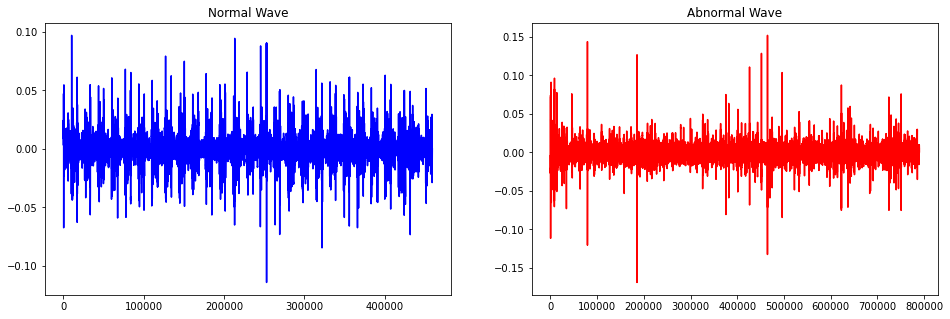

In [13]:
#Plot Gelombang Suara Jantung Normal dan Tidak Normal secara Berdampingan
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(normal_wav,color="b")
axes[0].set_title('Normal Wave')
axes[1].plot(abnormal_wav,color="r")
axes[1].set_title('Abnormal Wave')

# 6. Durasi File Audio
Durasi file audio adalah hal yang perlu diperhatikan. File pertama adalah 20 detik sedangkan yang ke-2 adalah 35 detik. Ada dua pendekatan untuk mengatasi hal tersebut yaitu:

a. Pad audio dengan nol sampai panjang tertentu.

b. Ulangi audio dengan panjang tertentu, misalnya panjang maksimum semua sampel audio.

Perlu diperhatikan juga bahwa LibROSA memiliki tingkat pengambilan sampel default di 22050.

In [14]:
#Sampling Rate

sample_rate = 22050
print(librosa.get_duration(normal_wav))
print(len(normal_wav)/sample_rate)

print(librosa.get_duration(abnormal_wav))
print(len(abnormal_wav)/sample_rate)
print("\n Ini mengonfirmasi tingkat sampel default yang digunakan oleh LibROSA")


#let set the audio to be 5 secs
atime = 5
audio_len = atime*sample_rate
print("\n Kami akan mengatur panjang audio kami untuk semua file menjadi:" + str(audio_len))

20.828526077097507
20.828526077097507
35.80553287981859
35.80553287981859

 Ini mengonfirmasi tingkat sampel default yang digunakan oleh LibROSA

 Kami akan mengatur panjang audio kami untuk semua file menjadi:110250


In [15]:
#Zero Padding semua file
def zero_pad_allfiles(files):
    pathfiles = list(map(lambda x: get_wave_path(x,wav_path),files))
    wave_files = []
    for file in pathfiles:
        wav, sr = load_wave_file(file)
        #pad dengan panjang audio
        wav_pad = zero_pad(wav, audio_len)  
        wave_files.append(wav_pad)
    return wave_files


#Menemukan panjang maksimal semua file
def get_max_len(files):
    maxL = 0
    for file in files:
        wav, sr = load_wav_file(file, wav_path)
        if len(wav) > maxL:
            maxL = len(wav)
    
    return maxL

#Memotong array di bawah panjangnya atau dan melapisi array di atas panjangnya dengan nol
def zero_pad(arr, length):
    l = len(arr)
    if l > length:
        result = arr[0:length]
    else:
        zero_pad = np.zeros(length - l)
        result = np.concatenate([arr, zero_pad])
    return result

#Mengulangi array np 1D ke panjang tertentu, dan membuat tipe data Float
def repeat_to_len(arr, length):
    result = np.empty((length, ), dtype = 'float32')
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

#Memotong array 2d di bawah panjangnya atau dan melapisi array di atas panjangnya dengan nol
def zero_pad_2d(arr, length):
    l = arr.shape[1]
    if l > length:
        result = arr[:,0:length]
    else:
        zero_pad = np.zeros((arr.shape[0], length - arr.shape[1]))
        result = np.hstack((arr, zero_pad))
        
    return result

#Berfungsi untuk memplot kurva ROC dan metrik lainnya
def plot_roc(y_test, y_pred, y_prob):  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [16]:
files = list(train['wavfile'])
wave_files = zero_pad_allfiles(files)

/Users/ASUS/heart_sound/training-a/a0001.wav
/Users/ASUS/heart_sound/training-a/a0002.wav
/Users/ASUS/heart_sound/training-a/a0003.wav
/Users/ASUS/heart_sound/training-a/a0004.wav
/Users/ASUS/heart_sound/training-a/a0005.wav
/Users/ASUS/heart_sound/training-a/a0006.wav
/Users/ASUS/heart_sound/training-a/a0007.wav
/Users/ASUS/heart_sound/training-a/a0008.wav
/Users/ASUS/heart_sound/training-a/a0009.wav
/Users/ASUS/heart_sound/training-a/a0010.wav
/Users/ASUS/heart_sound/training-a/a0011.wav
/Users/ASUS/heart_sound/training-a/a0012.wav
/Users/ASUS/heart_sound/training-a/a0013.wav
/Users/ASUS/heart_sound/training-a/a0014.wav
/Users/ASUS/heart_sound/training-a/a0015.wav
/Users/ASUS/heart_sound/training-a/a0016.wav
/Users/ASUS/heart_sound/training-a/a0017.wav
/Users/ASUS/heart_sound/training-a/a0018.wav
/Users/ASUS/heart_sound/training-a/a0019.wav
/Users/ASUS/heart_sound/training-a/a0020.wav
/Users/ASUS/heart_sound/training-a/a0021.wav
/Users/ASUS/heart_sound/training-a/a0022.wav
/Users/ASU

In [17]:
#lihat apa yang dimiliki
fivefiles = pd.DataFrame(wave_files[0:5])
fivefiles

,0,1,2,3,4,5,6,7,8,9,...,110240,110241,110242,110243,110244,110245,110246,110247,110248,110249
0,-0.002031,-0.002270,-0.002509,-0.002746,-0.002979,-0.003204,-0.003418,-0.003617,-0.003798,-0.003958,...,0.007677,0.007840,0.008020,0.008211,0.008410,0.008614,0.008821,0.009027,0.009232,0.009436
1,0.009013,0.010394,0.011809,0.013233,0.014643,0.016013,0.017320,0.018543,0.019662,0.020662,...,0.000194,0.000347,0.000498,0.000646,0.000790,0.000929,0.001064,0.001195,0.001323,0.001449
2,-0.003980,-0.004654,-0.005329,-0.005990,-0.006621,-0.007206,-0.007732,-0.008188,-0.008567,-0.008863,...,-0.085973,-0.085281,-0.084585,-0.083888,-0.083189,-0.082491,-0.081795,-0.081104,-0.080418,-0.079740
3,0.010882,0.012339,0.013764,0.015125,0.016395,0.017549,0.018566,0.019430,0.020130,0.020663,...,-0.008964,-0.008999,-0.009029,-0.009052,-0.009068,-0.009076,-0.009078,-0.009072,-0.009059,-0.009041
4,-0.001735,-0.001949,-0.002150,-0.002334,-0.002497,-0.002634,-0.002745,-0.002827,-0.002883,-0.002911,...,0.006714,0.007043,0.007361,0.007669,0.007964,0.008247,0.008519,0.008779,0.009028,0.009269
